## ДЗ №1

Используя данные таблицы 'math_students.csv', ответьте на следующие вопросы:

In [21]:
import pandas as pd

df = pd.read_csv('math_students.csv')

1. Какая причина выбора школы была самой частой? В качестве ответа приведите соответствующее значение признака.


In [22]:
df['reason'].describe()
# самая частая причина 'course'

count        395
unique         4
top       course
freq         145
Name: reason, dtype: object

2. Найдите количество студентов, у родителей которых нет никакого образования.

In [23]:
df[(df['Fedu'] == 0) & (df['Medu'] == 0)]
# нет таких студентов, чтобы у обоих родителей не было образования

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [24]:
df[(df['Fedu'] == 0) | (df['Medu'] == 0)]
# но есть 5 студентов, у которых хотя бы один родитель без образования

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
76,GP,M,15,U,GT3,T,4,0,teacher,other,...,3,4,3,1,1,1,8,11,11,10
127,GP,F,19,U,GT3,T,0,1,at_home,other,...,3,4,2,1,1,5,2,7,8,9
171,GP,M,16,U,GT3,T,1,0,other,other,...,4,3,2,1,1,3,2,13,15,16
249,GP,M,16,U,GT3,T,0,2,other,other,...,4,3,2,2,4,5,0,13,15,15
324,GP,F,17,U,LE3,T,0,2,at_home,at_home,...,3,3,3,2,3,2,0,16,15,15


3. Найдите минимальный возраст учащегося школы Mousinho da Silveira.

In [25]:
df[df['school'] == 'MS']['age'].min()
# 17 лет

17

4. Найдите количество студентов, имеющих нечетное число пропусков.

In [26]:
df[df['absences'] % 2 == 1].count()
# 41 студент имеет нечетное число пропусков

school        41
sex           41
age           41
address       41
famsize       41
Pstatus       41
Medu          41
Fedu          41
Mjob          41
Fjob          41
reason        41
guardian      41
traveltime    41
studytime     41
failures      41
schoolsup     41
famsup        41
paid          41
activities    41
nursery       41
higher        41
internet      41
romantic      41
famrel        41
freetime      41
goout         41
Dalc          41
Walc          41
health        41
absences      41
G1            41
G2            41
G3            41
dtype: int64

5. Найдите разность между средними итоговыми оценками студентов, состоящих и не состоящих в романтических отношениях. В качестве ответа приведите число, округленное до двух значащих цифр после запятой.

In [27]:
abs(round((df[df['romantic'] =='yes']['G3'].mean() - df[df['romantic'] =='no']['G3'].mean()),2))


1.26

6. Сколько занятий пропустило большинство студентов с самым частым значением наличия внеклассных активностей?

*Примечание. В данном контексте под "большинством" подразумеваются студенты, имеющее самое частое значение пропусков. То есть в данном задании необходимо:*


* *Определить самое частое значение наличия внеклассных активностей (да или нет).*
* *Для группы студентов, соответствующей этому значению, рассмотреть значения признака «число пропусков».*
* *Для каждого значения числа пропусков посчитать, сколько студентов ему соответствует.*
* *Выбрать значение числа пропусков с наибольшим числом студентов.*

In [28]:
df['activities'].value_counts()
# самое частое значение внекласных занятий 'yes'

yes    201
no     194
Name: activities, dtype: int64

In [29]:
df[df['activities']=='yes'].groupby(['absences']).agg({
'absences': 'count'})
# 0 раз пропустил 51 студент
# если все же брать факт пропуска, то следующее по количеству студентов значение пропуска - 2 раза

,absences
absences,
0,51
1,2
2,37
3,4
4,29
5,1
6,17
7,3
8,16


## ДЗ №2. Анализ данных пассажиров "Титаника"

In [30]:
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1. Сколько мужчин / женщин находилось на борту?

In [31]:
titanic_df['Sex'].value_counts()
# 577 мужчин, 314 женщин

male      577
female    314
Name: Sex, dtype: int64

2. Выведите распределение переменной Pclass (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?

In [32]:
print('Распределение всех людей:',titanic_df['Pclass'].value_counts(), sep='\n')
print('Распределение мужчин: ',titanic_df[titanic_df['Sex']=='male']['Pclass'].value_counts(), sep='\n')
print('Распределение женщин: ',titanic_df[titanic_df['Sex']=='female']['Pclass'].value_counts(), sep='\n')

#  во втором классе было 108 мужчин

Распределение всех людей:
3    491
1    216
2    184
Name: Pclass, dtype: int64
Распределение мужчин: 
3    347
1    122
2    108
Name: Pclass, dtype: int64
Распределение женщин: 
3    144
1     94
2     76
Name: Pclass, dtype: int64


3. Каковы медиана и стандартное отклонение платежей (Fare)? Округлите до 2 десятичных знаков.

In [33]:
print('median: ',round(titanic_df['Fare'].median(),2))
print('std: ',round(titanic_df['Fare'].std(),2))


median:  14.45
std:  49.69


4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?

In [34]:
# 1 - survived
print('Доля выживших в группе людей моложе 30 лет: ',
      titanic_df[titanic_df['Age'] < 30 ]['Survived'].value_counts()[1]/ titanic_df[titanic_df['Age'] < 30 ]['Survived'].count())
print('Доля выживших в группе людей старше 60 лет: ',
      titanic_df[titanic_df['Age'] > 60 ]['Survived'].value_counts()[1]/titanic_df[titanic_df['Age'] > 60 ]['Survived'].count())
# да, доля выживших среди людей моложе 30 больше, но погибло их больше

Доля выживших в группе людей моложе 30 лет:  0.40625
Доля выживших в группе людей старше 60 лет:  0.22727272727272727


5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?

In [35]:
# 1 - survived
print('Доля выживших среди женщин: ',
      titanic_df[titanic_df['Sex'] == 'female' ]['Survived'].value_counts()[1]/ titanic_df[titanic_df['Sex'] == 'female' ]['Survived'].count())
print('Доля выживших среди мужчин: ',
      titanic_df[titanic_df['Sex'] == 'male' ]['Survived'].value_counts()[1]/titanic_df[titanic_df['Sex'] == 'male' ]['Survived'].count())
# да, доля выживших среди женщин выше, так как их первыми сажали в спасательные шлюпки

Доля выживших среди женщин:  0.7420382165605095
Доля выживших среди мужчин:  0.18890814558058924


6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?

In [36]:
male_names = titanic_df[titanic_df['Sex'] == 'male']['Name']
list = []
for name in male_names:
        list.append(name.split()[2])
print(pd.DataFrame(list).value_counts()) 
# William - самое популярное имя среди пассажирова мужского пола

William    35
John       25
George     14
Charles    13
Thomas     13
           ..
Hudson      1
Husein      1
Ignjac      1
Iisakki     1
hoef,       1
Length: 281, dtype: int64


7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?

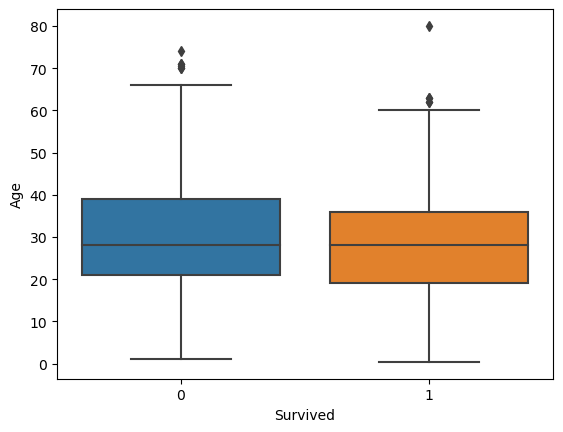

In [39]:
import seaborn as sns

sns.boxplot( x='Survived', y='Age', data=titanic_df);

# да, средний возраст погибших выше

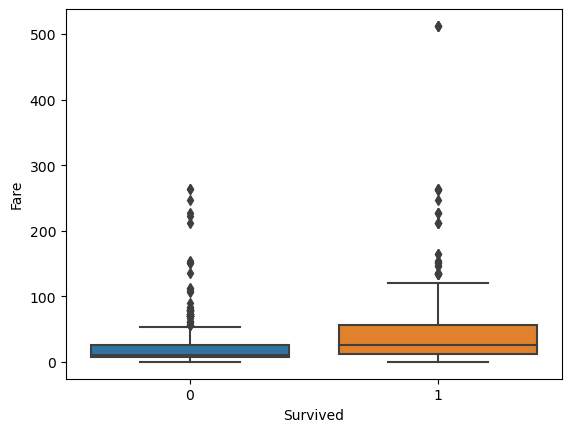

In [40]:
sns.boxplot(x='Survived',y='Fare',data=titanic_df);

8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания?

    - В среднем мужчины 1-го класса старше 40 лет
    - В среднем женщины 1-го класса старше 40 лет
    - Мужчины всех классов в среднем старше женщин того же класса
    - В среднем люди в 1-ом классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [65]:
print(('Нет', 'Да')[titanic_df[(titanic_df['Pclass']==1) & (titanic_df['Sex'] == 'male')]['Age'].mean()>40])
print(('Нет', 'Да')[titanic_df[(titanic_df['Pclass']==1) & (titanic_df['Sex'] == 'female')]['Age'].mean() > 40])

list=[]
for i in range(1,4):
    list.append(titanic_df[(titanic_df['Sex'] == 'male') & (titanic_df['Pclass']==i)]['Age'].mean() >titanic_df[(titanic_df['Sex'] == 'female') & (titanic_df['Pclass']==i)]['Age'].mean() )
print(('Нет', 'Да')[all(list)])

print(('Нет', 'Да')[titanic_df[titanic_df['Pclass']==1]['Age'].mean() > titanic_df[titanic_df['Pclass']==2]['Age'].mean() and titanic_df[titanic_df['Pclass']==2]['Age'].mean() > titanic_df[titanic_df['Pclass']==3]['Age'].mean()])

Да
Нет
Да
Да
